In [1]:
# importing sys
import sys
# adding Plot to the system path
sys.path.insert(0, '/Users/nathan d/Desktop/Python/Plot')


#dependencies
import Plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
#metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#importing the dataset
dataset = pd.read_csv('Diamonds.csv')
independant = dataset.iloc[:,0].values.reshape(-1,1)
dependant = dataset.iloc[:,-1].values

In [ ]:
#Inspect data

In [3]:
#splitting independant and dependant variables into a train and test set
independant_train, independant_test, dependant_train, dependant_test = train_test_split(independant, dependant, train_size=0.8, random_state=0)

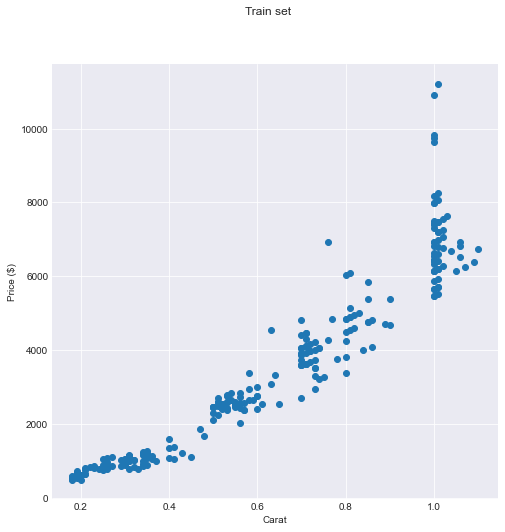

In [4]:
#EDA
EDA_scatter_plot = Plot.MultivariatePlot("Carat","Price ($)","Train set")
EDA_scatter_plot.Scatter(independant_train, dependant_train)
EDA_scatter_plot.Show()

In [5]:
def Linear(independant_test_data):
    #fitting the linear regression model to the data
    regressor = LinearRegression()
    regressor.fit(independant_train, dependant_train)
    #predicting dependant variable values from the test set
    return regressor.predict(independant_test_data)

def Polynomial(independant_test_data, degree):
    #Polynomial regression
    polynomial_features = PolynomialFeatures(degree=degree)
    independant_train_transformed = polynomial_features.fit_transform(independant_train)
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(independant_train_transformed, dependant_train)
    #predicting dependant variable values from the test set
    return polynomial_regressor.predict(polynomial_features.transform(independant_test_data))

def DecisionTree(independant_test_data):
    #Decision tree
    DT_regressor = DecisionTreeRegressor(random_state=0)
    DT_regressor.fit(independant_train,dependant_train)
    #predicting dependant variable values from the test set
    return DT_regressor.predict(independant_test_data)

def RandomForest(independant_test_data, estimators):
    #Random forest
    RF_regressor = RandomForestRegressor(n_estimators = estimators, random_state = 0)
    RF_regressor.fit(independant_train, dependant_train)
    #predicting dependant variable values from the test set
    return RF_regressor.predict(independant_test_data)

def SupportVector(independant_test_data, kernel):
    #SVR
    #scaling the data before passing it to the regressor
    sc_dependant = StandardScaler()
    dependant_train_sc = sc_dependant.fit_transform(dependant_train.reshape(-1,1))
    sc_independant = StandardScaler()
    independant_train_sc = sc_independant.fit_transform(independant_train)

    SVR_regressor = SVR(kernel=kernel) #different kernals learn linear, nonlinear ... features
    SVR_regressor.fit(independant_train_sc, dependant_train_sc)
    #predicting dependant variable values from the test set
    return sc_dependant.inverse_transform( SVR_regressor.predict(sc_independant.transform(independant_test_data)) )

In [6]:
predictions: dict = {
    'Linear': Linear(independant_test),
    'Polynomial': Polynomial(independant_test, 2),
    'DecTree': DecisionTree(independant_test),
    'RandFrst': RandomForest(independant_test, 10),
    'SVR': SupportVector(independant_test, 'linear')
}
residuals: dict = {
    'Linear': dependant_test - predictions['Linear'],
    'Polynomial': dependant_test - predictions['Polynomial'],
    'DecTree': dependant_test - predictions['DecTree'],
    'RandFrst': dependant_test - predictions['RandFrst'],
    'SVR': dependant_test - predictions['SVR']
}

C:\Users\nathan d\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\Users\nathan d\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


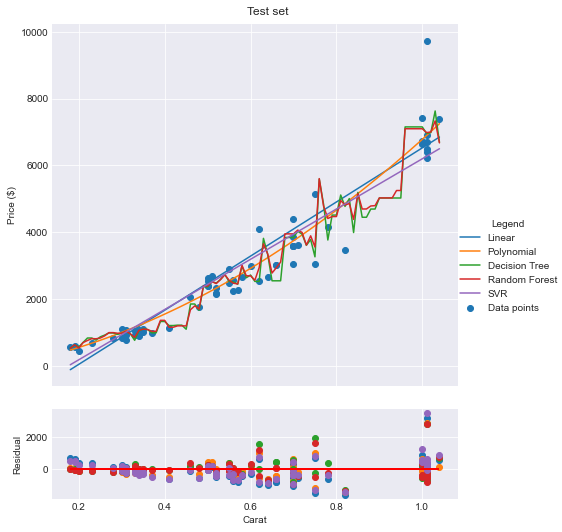

In [8]:
X_high_res = np.arange(min(independant_test), max(independant_test), 0.01).reshape(-1,1)

plot = Plot.MultivariatePlot("Carat","Price ($)","Test set", residual=True)
plot.Scatter(independant_test, dependant_test, label='Data points')

plot.Plot(X_high_res, Linear(X_high_res), label='Linear')
plot.Plot(X_high_res, Polynomial(X_high_res, 2), label='Polynomial')
plot.Plot(X_high_res, DecisionTree(X_high_res), label='Decision Tree')
plot.Plot(X_high_res, RandomForest(X_high_res, 10), label='Random Forest')
plot.Plot(X_high_res, SupportVector(X_high_res, 'linear'), label='SVR')

for key, values in residuals.items():
    plot.Residual(independant_test, values)

plot.Legend()
plot.Show()

In [15]:
#calculating the adjusted R^2 value for each model along with RMSE and MAE
df = pd.DataFrame(columns=['Model', 'R^2', 'Adjusted R^2', 'RMSE', 'MAE'])
df['Model'] = [key for key in predictions.keys()]
df.set_index('Model', inplace=True)

for key, values in (predictions.items()):
    df['R^2'][key] = r2_score(dependant_test, values)
    df['Adjusted R^2'][key] = 1 - ((1 - df['R^2'][key]) * (len(dependant_test) - 1) / (len(dependant_test) - 1 - 1))
    df['RMSE'][key] = np.sqrt(mean_squared_error(dependant_test, values))
    df['MAE'][key] = mean_absolute_error(dependant_test, values)

print(df)

                 R^2 Adjusted R^2        RMSE         MAE
Model                                                    
Linear      0.901787      0.90015  665.582203  466.698371
Polynomial  0.932811     0.931691  550.510888  347.199581
DecTree     0.924421     0.923161  583.872565  347.367103
RandFrst    0.931184     0.930037  557.138458  339.587844
SVR         0.899543     0.897869  673.143623  460.608591


Polynomial of order 2 (i.e. a quadratic curve) best models the test data.
1. Residuals for this lie cloeset to the zero line with no obvious trend (though no modesl produce and obvious trend).
2. Adjusted R^2 is larges for this, therefore, the varaiation in the data is best explained by this model.
3. RMSE is the lowest for this model suggesting the smallest errors present with fewest outliers (the squaring will heavily weight any large errors compared to smaller errors).
4. MAE is not the smallest.